In [ ]:
import numpy as np

In [ ]:
# Ground-truth box (absolute pixels)
x_gt, y_gt, w_gt, h_gt = 200, 150, 80, 60   # center x, center y, width, height # of ground truth
img_size = 416

In [ ]:
grid = 13                                      # 13x13 grid for YOLOv3
stride = img_size / grid                       # 416/13 = 32 pixels per cell

In [ ]:
cx, cy = int(x_gt // stride), int(y_gt // stride)  # cell index

In [ ]:
print(stride)
print(x_gt, y_gt)
print(cx, cy)

32.0
200 150
6 4


Anchor box dimensions are typically determined through a clustering algorithm (like K-means) on the ground-truth bounding boxes of your training dataset.

In [ ]:
# Anchor (chosen based on best IoU) # anchor width & height in pixels
p_w, p_h = 62, 45

In [ ]:
# Normalize to grid cell

x_rel = (x_gt / stride) - cx  # fractional part within the grid cell
y_rel = (y_gt / stride) - cy
w_rel = w_gt / img_size
h_rel = h_gt / img_size

In [ ]:
print(x_rel, y_rel) # Relative (within cell)

0.25 0.6875


In [ ]:
round(w_rel, 3), round(h_rel, 3) # Normalized sizes

(0.192, 0.144)

In [ ]:
# Compute target deltas (tx*, ty*, tw*, th*)
def sigmoid_inverse(z):
    return np.log(z / (1 - z))

tx_star = sigmoid_inverse(x_rel)
ty_star = sigmoid_inverse(y_rel)
tw_star = np.log(w_rel / (p_w / img_size))
th_star = np.log(h_rel / (p_h / img_size))

In [ ]:
print("\nYOLO Target Deltas:")
print(f"tx* = {tx_star:.3f}")
print(f"ty* = {ty_star:.3f}")
print(f"tw* = {tw_star:.3f}")
print(f"th* = {th_star:.3f}")


YOLO Target Deltas:
tx* = -1.099
ty* = 0.788
tw* = 0.255
th* = 0.288


In [ ]:
bx = (1 / (1 + np.exp(-tx_star))) + cx # sigmoid of tx*
by = (1 / (1 + np.exp(-ty_star))) + cy
bw = p_w * np.exp(tw_star)
bh = p_h * np.exp(th_star)

In [ ]:
print(bx, by)

6.25 4.6875


In [ ]:
print(bw.round(2), bh)

80.0 60.0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
stride

32.0

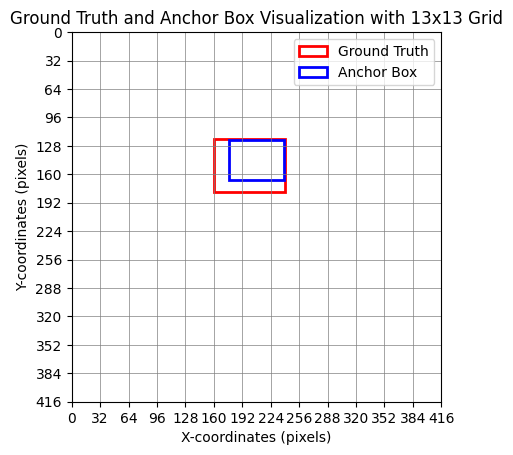

In [ ]:
fig, ax = plt.subplots(1)

# Display the image (assuming a blank canvas for visualization)
# In a real scenario, you would load and display your image here
ax.set_xlim([0, img_size])
ax.set_ylim([0, img_size])
ax.set_aspect('equal', adjustable='box')
ax.invert_yaxis() # Invert y-axis to match image coordinates

# Create the ground truth rectangle
# Rectangle takes bottom left corner (x, y), width, and height
# We have center x, y, so we need to calculate the bottom left
rect_gt = patches.Rectangle((x_gt - w_gt/2, y_gt - h_gt/2), w_gt, h_gt,
        linewidth=2, edgecolor='r', facecolor='none', label='Ground Truth')

# Create the anchor box rectangle
# Anchor box is placed at the center of the grid cell (cx, cy)
# Anchor box dimensions are p_w, p_h
rect_anchor = patches.Rectangle((cx * stride + stride/2 - p_w/2, cy * stride + stride/2 - p_h/2), p_w, p_h,
        linewidth=2, edgecolor='b', facecolor='none', label='Anchor Box')

# Add the rectangles to the axes
ax.add_patch(rect_gt)
ax.add_patch(rect_anchor)

# Add grid lines for the 13x13 grid
ax.set_xticks(np.arange(0, img_size + 1, stride))
ax.set_yticks(np.arange(0, img_size + 1, stride))
ax.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)

ax.legend()

plt.title("Ground Truth and Anchor Box Visualization with 13x13 Grid")
plt.xlabel("X-coordinates (pixels)")
plt.ylabel("Y-coordinates (pixels)")
plt.show()